In [2]:
import sys
sys.path.append("..")
import math
import torch
from torch import tensor
import parts
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, update_display

In [9]:
class MemoryLayer(parts.Layer):
	def update(self):
		self.updateV()
	def learn(self):
		for sender in self.w:
			self.w[sender] += sender.v[:,None] * (self.v[None,:]*2.0-1.0) * 0.1
			self.w[sender].clamp_(0.0,1.0)

In [7]:
torch.manual_seed(0)
patterns=[(torch.rand((40,)) < 0.2) for _ in range(3)]

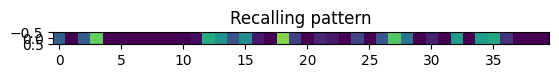

In [10]:
layer=MemoryLayer(40)
disp=display(display_id=True)
for p in patterns: # train
	layer.v.zero_()
	for _ in range(10):
		layer.inputTensor(p)
		layer.input(layer,bidirectional=False)
		layer.update()

		plt.imshow([layer.v], vmin=0,vmax=1)
		clear_output(True)
		plt.title("Training on pattern")
		disp.update(plt.figure)
		plt.pause(0.1)
	layer.learn()

for p in patterns: # recall
	layer.v.zero_()
	layer.inputTensor(p)
	for _ in range(10):
		layer.input(layer,bidirectional=False)
		layer.update()

		plt.imshow([layer.v], vmin=0,vmax=1)
		plt.title("Recalling pattern")
		clear_output(True)
		disp.update(plt.figure)
		plt.pause(0.1)

it keeps recalling the same thing even with different input